In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


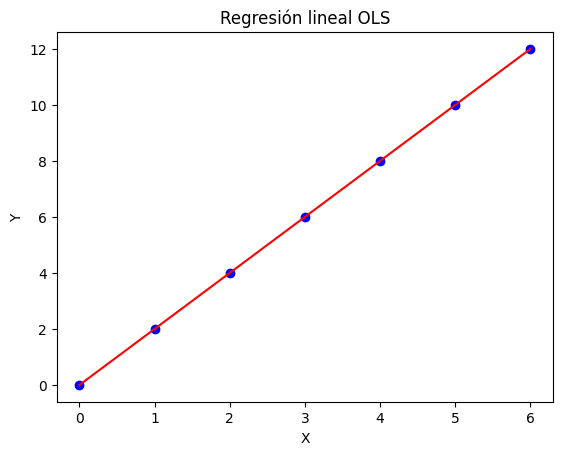

y = 0.0 + 2.0*x


In [46]:
def ols_regression(file_name):

    df = pd.read_csv(file_name)

    x = np.array(df.iloc[:, 0])
    y = np.array(df.iloc[:, 1])

    n = len(x)

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x*y)
    xx_mean = np.mean(x*x)
    slope = (x_mean * y_mean - xy_mean) / (x_mean**2 - xx_mean)
    intercept = y_mean - slope * x_mean
    
    eq = f'y = {intercept} + {slope}*x'

    plt.scatter(x, y, color='blue')
    plt.plot(x, slope * x + intercept, color='red')
    plt.title('Regresión lineal OLS')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    return eq

print(ols_regression("ols.csv"))


   x  y
0  1  3
1  2  6
2  3  9
Iter 0: 0.84
Iter 1: 1.4447999999999999
Iter 2: 1.880256
Iter 3: 2.19378432
Iter 4: 2.4195247103999997
Ecuacion de Y = 2.4195247103999997 x



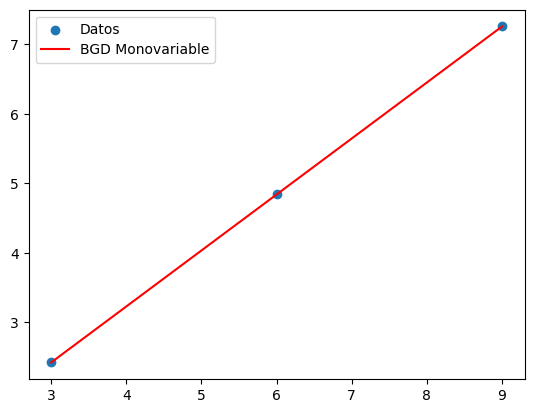

In [47]:
def BGD_Monovariable(w = 0, a = 0.01, iter = 5):
    dataframe = pd.read_csv("mono.csv")
    print(dataframe)

    x = dataframe["x"].values
    y = dataframe["y"].values
    
    wHistory = list()

    for i in range(iter):
        sum = 0
        
        for j in range(len(x)):
            sum += (w*x[j]-y[j])*x[j]

        w = w - (a*2*sum)
        wHistory.append(w)


    for i in range(iter):
        print(f'Iter {i}: {wHistory[i]}')    

    
    print(f"Ecuacion de Y = {w}",'x\n')

    # Predicción de valores de y
    y_pred = np.dot(x, w)

    plt.scatter(y, y_pred, label='Datos')
    plt.plot(y, y_pred, color='r', label='BGD Monovariable')
    plt.legend()
    plt.show()
    
BGD_Monovariable()

   x0  x1  x2   y
0   1   1   1   5
1   1   2   3  13
2   1   3   5  21
Iter 0: W0: 0.78, W1: 1.88, W2: 2.98
Iter 1: W0: 1.51, W1: 3.23, W2: 3.87
Iter 2: W0: 2.2, W1: 4.21, W2: 4.14
Iter 3: W0: 2.85, W1: 4.91, W2: 4.22
Iter 4: W0: 3.46, W1: 5.42, W2: 4.25
Ecuacion de Y = 3.46 + 5.42 x1 + 4.25 x2



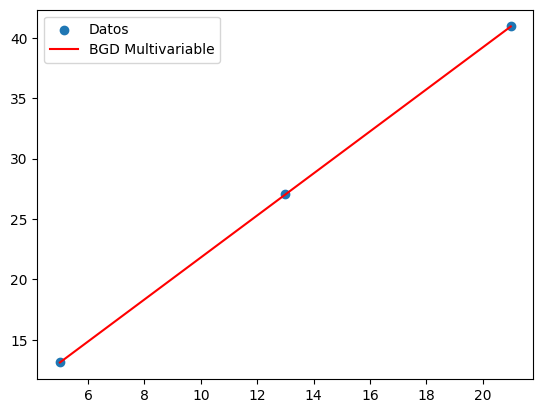

In [48]:
def BGD_Multivariable(iter = 5):
    dataframe = pd.read_csv("multi.csv")
    print(dataframe)

    x = dataframe[['x0', 'x1', 'x2']].values
    y = dataframe['y'].values

    w = np.zeros(3)  # w = [0, 0, 0]
    a = 0.01
    k = len(x)
    
    wHistory = [[],[],[]]

    for i in range(len(x)):
        for j in range(iter):
            sum = 0
            for k in range(len(x)):
                sum += (w[i]*x[i][k]-y[k])*x[i][k]
            w[i] = (w[i] - (a*2*sum))

            wHistory[i].append(w[i])
            
        
    for i in range(iter):
        print(f'Iter {i}: W0: {round(wHistory[0][i],2)}, W1: {round(wHistory[1][i],2)}, W2: {round(wHistory[2][i],2)}')


    print(f"Ecuacion de Y =", round(w[0],2), "+", round(w[1],2), "x1 +", round(w[2],2), "x2\n")

    # Predicción de valores de y
    y_pred = np.dot(x, w)

    plt.scatter(y, y_pred, label='Datos')
    plt.plot(y, y_pred, color='r', label='BGD Multivariable')
    plt.legend()
    plt.show()

BGD_Multivariable()

In [50]:
def SGD_MultiVariable():
    print("------------------------------------------------------------")
    print("\033[34mGradiente descendente estocástico (SGD) Multivariable\033[0m")
    df=pd.read_csv("multi.csv", sep=",")

    x=df[['x0', 'x1', 'x2']].values
    y=df["y"].values

    w=[0,0,0]
    a=0.01
    k=len(x)

    nIter=int(input('Cuantas iteraciones quieres: '))
    valoresJ=[]

    for i in range(nIter):
        print("Valor de J[",i,"] :",end='')
        valorJ=int(input())
        valoresJ.append(valorJ)
    
    while k > 0:
        for i in range(len(x)):
            for j in valoresJ:
                w[i] = w[i]-(a*2*(w[i]*x[j][i]-y[j])*x[j][i])
            print(w)
        k-=1
        
    
    print(f"Ecuación de Y =",w[0],"* x0 +",w[1],"* x1 + ",w[2]," * x2")

SGD_MultiVariable()


------------------------------------------------------------
Gradiente descendente estocástico (SGD) Multivariable
Valor de J[ 0 ] :

ValueError: invalid literal for int() with base 10: ''